Dataset: PLANT VILLAGE

In [1]:
from google.colab import drive
drive.mount("/content/drive")
#ult

Mounted at /content/drive


MODELO

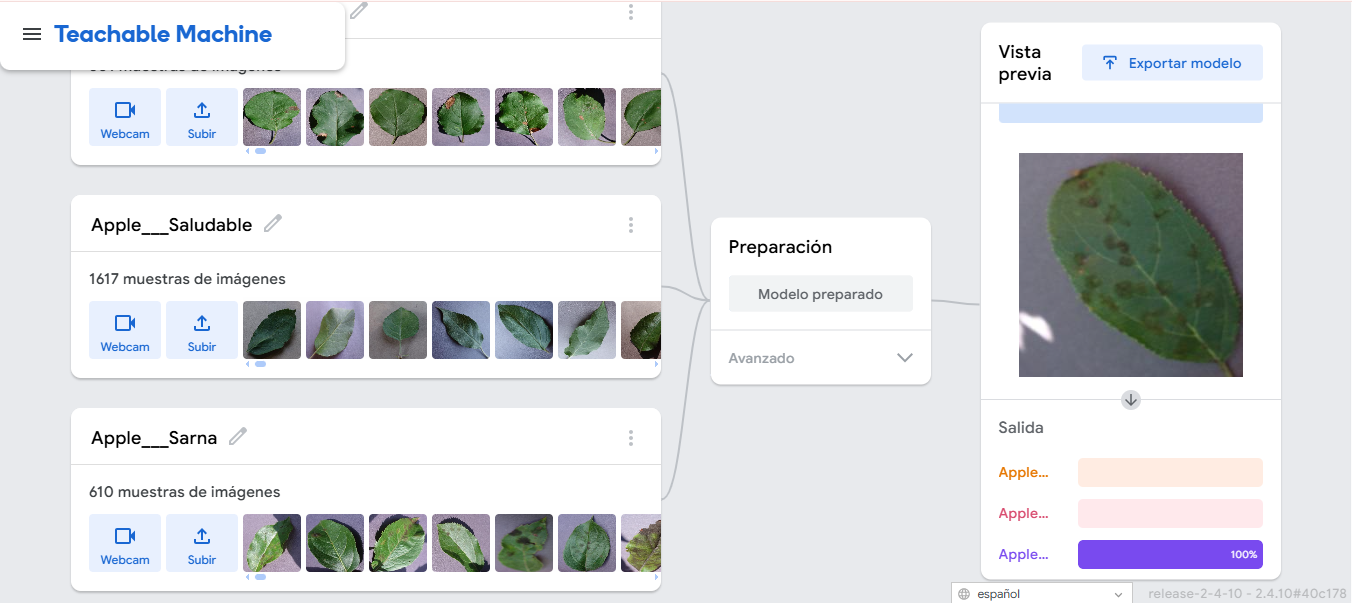

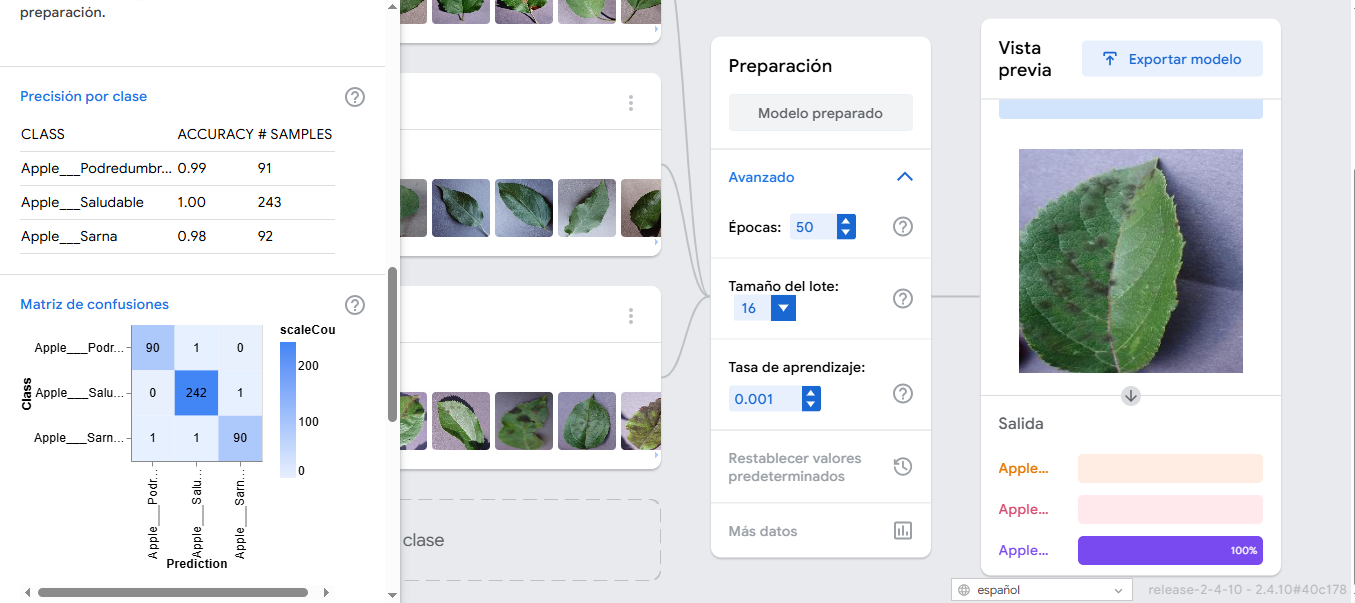

CARGAMOS MODELO

In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

In [ ]:
from tensorflow.keras.layers import DepthwiseConv2D
import tensorflow.keras.utils as utils
original_from_config = DepthwiseConv2D.from_config

@classmethod
def patched_from_config(cls, config):
  config.pop('groups', None)
  return original_from_config(config)

DepthwiseConv2D.from_config = patched_from_config

In [ ]:
#from keras.models import load_model  # TensorFlow is required for Keras to work
#from tensorflow.keras.models import load_model # Use tf.keras

#from PIL import Image, ImageOps  # Install pillow instead of PIL
#import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/drive/MyDrive/CienciaDatos_Proy3/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/drive/MyDrive/CienciaDatos_Proy3/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
#image = Image.open("/content/drive/MyDrive/CienciaDatos_Proy3/Test/Apple___PodredumbreNegra/fa8eff59-b9f9-45d9-a8f4-eca6fa5a8896___JR_FrgE.S 8647.JPG").convert("RGB")
image = Image.open("/content/drive/MyDrive/CienciaDatos_Proy3/Test/Apple___Saludable/fb5116a2-272b-49af-9c27-9b117376a306___RS_HL 8021.JPG").convert("RGB")
# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

RecursionError: maximum recursion depth exceeded